This project analyzes NYC motor vehicle collisions to identify accident trends and predict severity using Machine Learning.

Data Loading & Preprocessing

In [1]:
import pandas as pd

url = "https://data.cityofnewyork.us/resource/h9gi-nx95.csv"
df = pd.read_csv(url)
df.head()


,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2021-09-11T00:00:00.000,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26T00:00:00.000,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2023-11-01T00:00:00.000,1:29,BROOKLYN,11230.0,40.62179,-73.970024,"\n, \n(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,2022-06-29T00:00:00.000,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,2022-09-21T00:00:00.000,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   crash_date                     1000 non-null   object 
 1   crash_time                     1000 non-null   object 
 2   borough                        630 non-null    object 
 3   zip_code                       629 non-null    float64
 4   latitude                       915 non-null    float64
 5   longitude                      915 non-null    float64
 6   location                       915 non-null    object 
 7   on_street_name                 742 non-null    object 
 8   off_street_name                450 non-null    object 
 9   cross_street_name              258 non-null    object 
 10  number_of_persons_injured      1000 non-null   int64  
 11  number_of_persons_killed       1000 non-null   int64  
 12  number_of_pedestrians_injured  1000 non-null   in

In [3]:
df.describe()

,zip_code,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,collision_id
count,629.000000,915.000000,915.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.00000,1000.000000,1.000000e+03
mean,10909.310016,40.409804,-73.354616,0.448000,0.004000,0.074000,0.003000,0.038000,0.0,0.32700,0.001000,4.442998e+06
std,516.586266,3.551001,6.444781,0.779682,0.063151,0.265696,0.054717,0.191292,0.0,0.76069,0.031623,4.602814e+04
min,10001.000000,0.000000,-74.200980,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,4.136992e+06
25%,10459.000000,40.659735,-73.967310,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,4.407775e+06
50%,11209.000000,40.707928,-73.926500,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,4.408323e+06
75%,11236.000000,40.783244,-73.872325,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,4.456880e+06
max,11692.000000,40.905174,0.000000,7.000000,1.000000,2.000000,1.000000,1.000000,0.0,7.00000,1.000000,4.675877e+06


In [4]:
df.isnull().sum()

,0
crash_date,0
crash_time,0
borough,370
zip_code,371
latitude,85
longitude,85
location,85
on_street_name,258
off_street_name,550
cross_street_name,742


In [5]:
df.drop(["vehicle_type_code_3", "vehicle_type_code_4", "vehicle_type_code_5",
         "contributing_factor_vehicle_3", "contributing_factor_vehicle_4", "contributing_factor_vehicle_5"], axis=1, inplace=True)


In [6]:
df.isnull().sum()

,0
crash_date,0
crash_time,0
borough,370
zip_code,371
latitude,85
longitude,85
location,85
on_street_name,258
off_street_name,550
cross_street_name,742


In [7]:
df["borough"].fillna(df["borough"].mode()[0], inplace=True)
df["zip_code"].fillna(df["zip_code"].mode()[0], inplace=True)

df.dropna(subset=["latitude", "longitude"], inplace=True)

df["on_street_name"].fillna("Unknown", inplace=True)
df["off_street_name"].fillna("Unknown", inplace=True)
df["cross_street_name"].fillna("Unknown", inplace=True)


<ipython-input-7-a8c3c399f99e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["borough"].fillna(df["borough"].mode()[0], inplace=True)
<ipython-input-7-a8c3c399f99e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [8]:
print(df.isnull().sum())


crash_date                         0
crash_time                         0
borough                            0
zip_code                           0
latitude                           0
longitude                          0
location                           0
on_street_name                     0
off_street_name                    0
cross_street_name                  0
number_of_persons_injured          0
number_of_persons_killed           0
number_of_pedestrians_injured      0
number_of_pedestrians_killed       0
number_of_cyclist_injured          0
number_of_cyclist_killed           0
number_of_motorist_injured         0
number_of_motorist_killed          0
contributing_factor_vehicle_1      2
contributing_factor_vehicle_2    207
collision_id                       0
vehicle_type_code1                12
vehicle_type_code2               317
dtype: int64


In [9]:
df["contributing_factor_vehicle_1"].fillna("Unknown", inplace=True)
df["contributing_factor_vehicle_2"].fillna("Unknown", inplace=True)
df["vehicle_type_code1"].fillna("Unknown", inplace=True)
df["vehicle_type_code2"].fillna("Unknown", inplace=True)


<ipython-input-9-c2c99c1843c9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["contributing_factor_vehicle_1"].fillna("Unknown", inplace=True)
<ipython-input-9-c2c99c1843c9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [10]:
print(df.isnull().sum())


crash_date                       0
crash_time                       0
borough                          0
zip_code                         0
latitude                         0
longitude                        0
location                         0
on_street_name                   0
off_street_name                  0
cross_street_name                0
number_of_persons_injured        0
number_of_persons_killed         0
number_of_pedestrians_injured    0
number_of_pedestrians_killed     0
number_of_cyclist_injured        0
number_of_cyclist_killed         0
number_of_motorist_injured       0
number_of_motorist_killed        0
contributing_factor_vehicle_1    0
contributing_factor_vehicle_2    0
collision_id                     0
vehicle_type_code1               0
vehicle_type_code2               0
dtype: int64


In [11]:
df["crash_date"] = pd.to_datetime(df["crash_date"])
df["crash_time"] = pd.to_datetime(df["crash_time"], format='%H:%M').dt.hour


In [12]:
df["day_of_week"] = df["crash_date"].dt.day_name()
df["month"] = df["crash_date"].dt.month_name()
df["is_weekend"] = df["day_of_week"].apply(lambda x: 1 if x in ["Saturday", "Sunday"] else 0)


In [13]:
print(df.head())


   crash_date  crash_time   borough  zip_code   latitude  longitude  \
2  2023-11-01           1  BROOKLYN   11230.0  40.621790 -73.970024   
9  2021-09-11           9  BROOKLYN   11208.0  40.667202 -73.866500   
10 2021-12-14           8  BROOKLYN   11233.0  40.683304 -73.917274   
12 2021-12-14          17  BROOKLYN   11207.0  40.709183 -73.956825   
13 2021-12-14           8     BRONX   10475.0  40.868160 -73.831480   

                          location              on_street_name  \
2    \n,  \n(40.62179, -73.970024)               OCEAN PARKWAY   
9     \n,  \n(40.667202, -73.8665)                     Unknown   
10  \n,  \n(40.683304, -73.917274)             SARATOGA AVENUE   
12  \n,  \n(40.709183, -73.956825)  BROOKLYN QUEENS EXPRESSWAY   
13    \n,  \n(40.86816, -73.83148)                     Unknown   

   off_street_name            cross_street_name  ...  \
2         AVENUE K                      Unknown  ...   
9          Unknown      1211      LORING AVENUE  ...   
10  DECA

EDA

<Axes: title={'center': 'Total Accidents Per Year'}, xlabel='crash_date'>

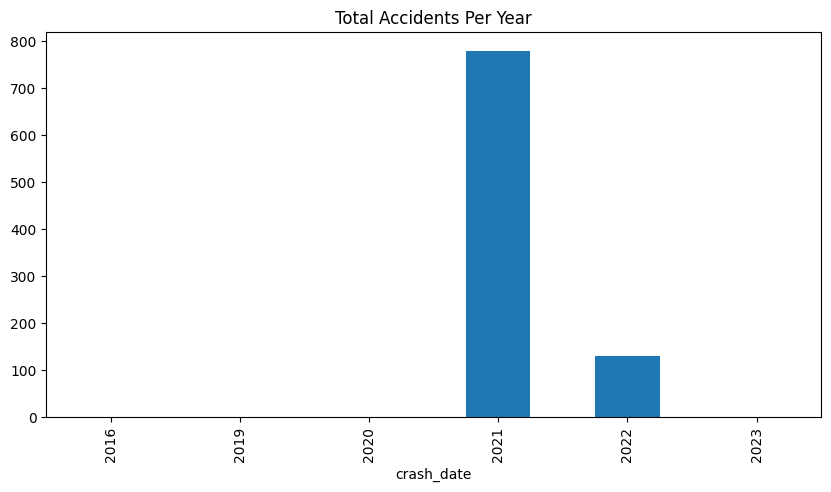

In [14]:
df["crash_date"].dt.year.value_counts().sort_index().plot(kind="bar", figsize=(10,5), title="Total Accidents Per Year")


<Axes: title={'center': 'Accidents by Hour'}, xlabel='crash_time'>

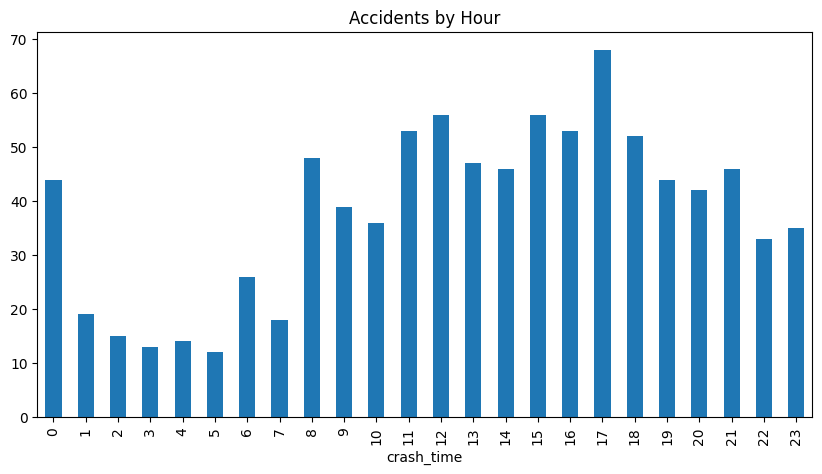

In [15]:
df["crash_time"].value_counts().sort_index().plot(kind="bar", figsize=(10,5), title="Accidents by Hour")


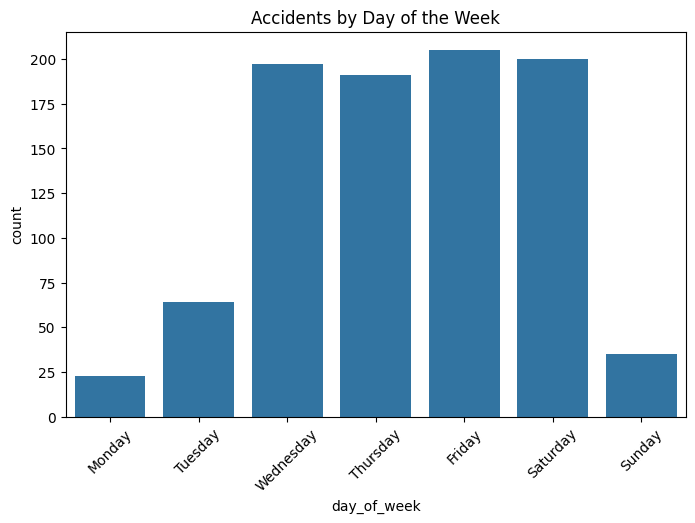

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="day_of_week", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Accidents by Day of the Week")
plt.xticks(rotation=45)
plt.show()


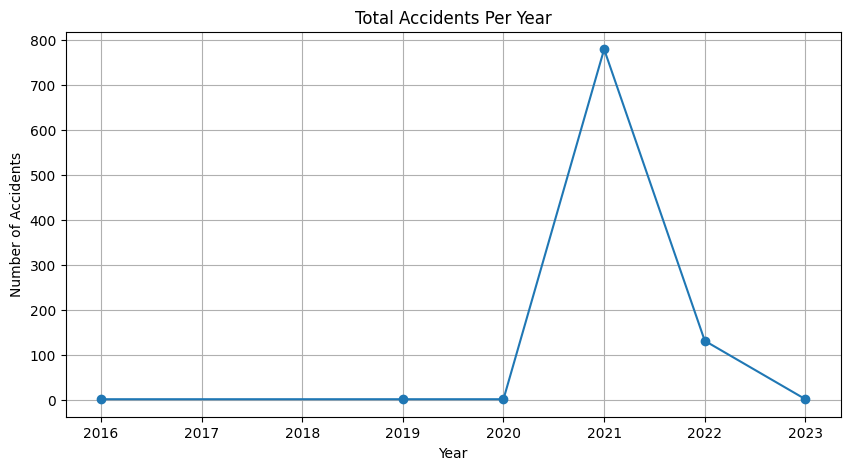

In [17]:
import matplotlib.pyplot as plt

df["year"] = df["crash_date"].dt.year
df["year"].value_counts().sort_index().plot(kind="line", figsize=(10,5), marker="o", title="Total Accidents Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid()
plt.show()


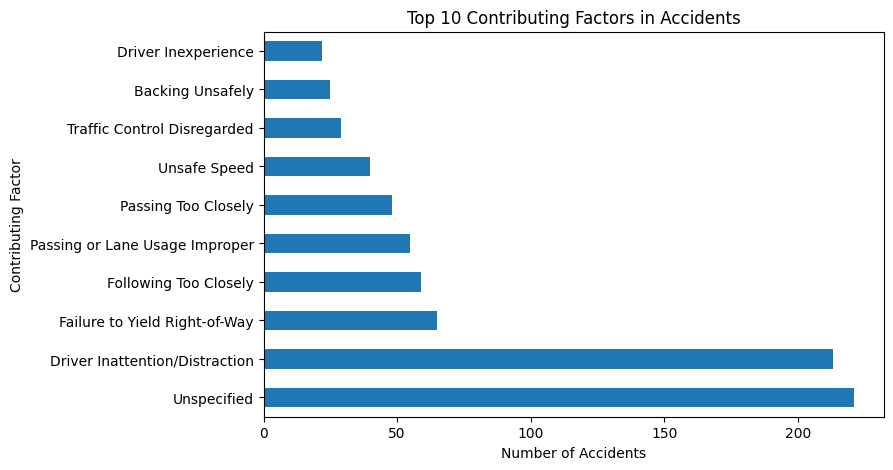

In [18]:
df["contributing_factor_vehicle_1"].value_counts().head(10).plot(kind="barh", figsize=(8,5), title="Top 10 Contributing Factors in Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Contributing Factor")
plt.show()


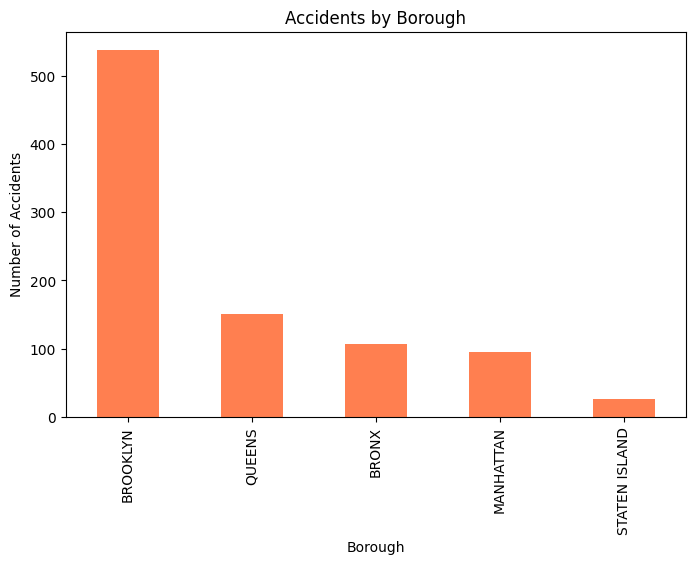

In [19]:
df["borough"].value_counts().plot(kind="bar", figsize=(8,5), title="Accidents by Borough", color="coral")
plt.xlabel("Borough")
plt.ylabel("Number of Accidents")
plt.show()


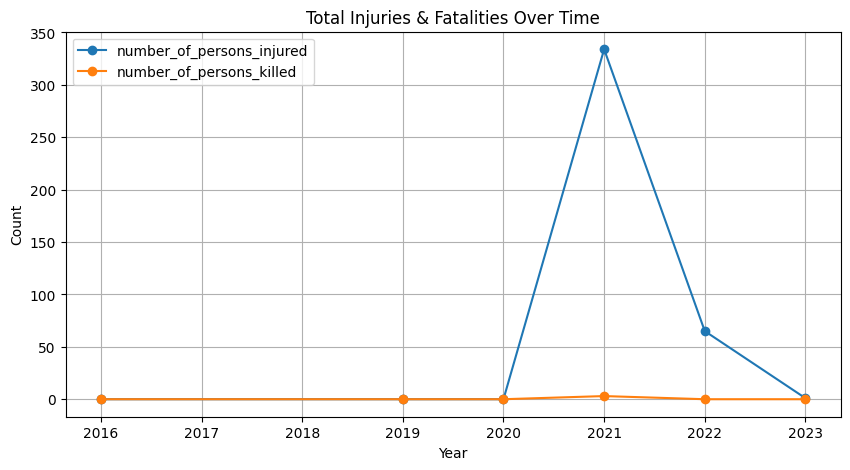

In [20]:
df.groupby("year")[["number_of_persons_injured", "number_of_persons_killed"]].sum().plot(figsize=(10,5), marker="o", title="Total Injuries & Fatalities Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid()
plt.show()


<ipython-input-21-65c18e3c44dd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="is_weekend", palette="Set2")


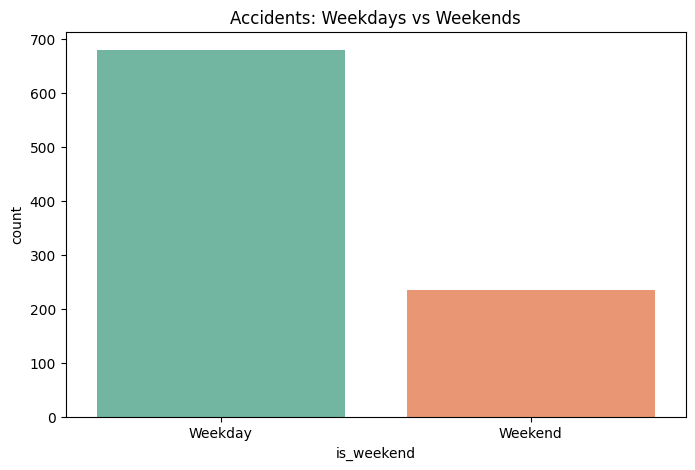

In [21]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="is_weekend", palette="Set2")
plt.title("Accidents: Weekdays vs Weekends")
plt.xticks([0,1], ["Weekday", "Weekend"])
plt.show()


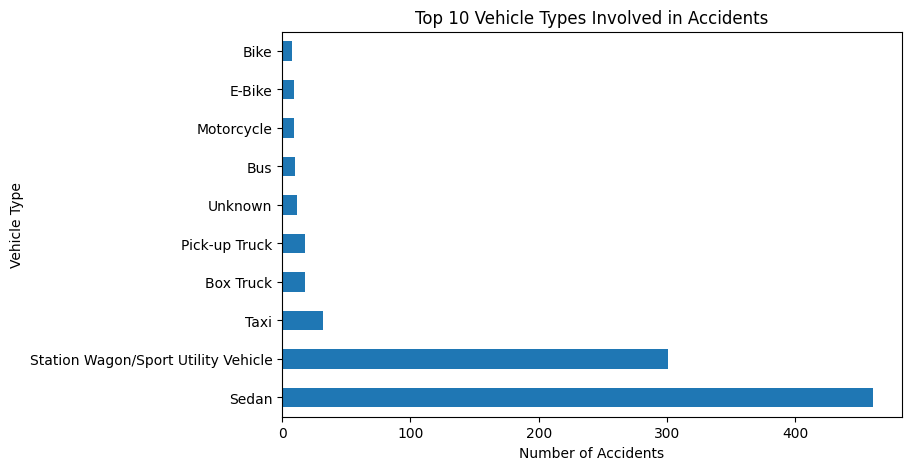

In [22]:
df["vehicle_type_code1"].value_counts().head(10).plot(kind="barh", figsize=(8,5), title="Top 10 Vehicle Types Involved in Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Vehicle Type")
plt.show()


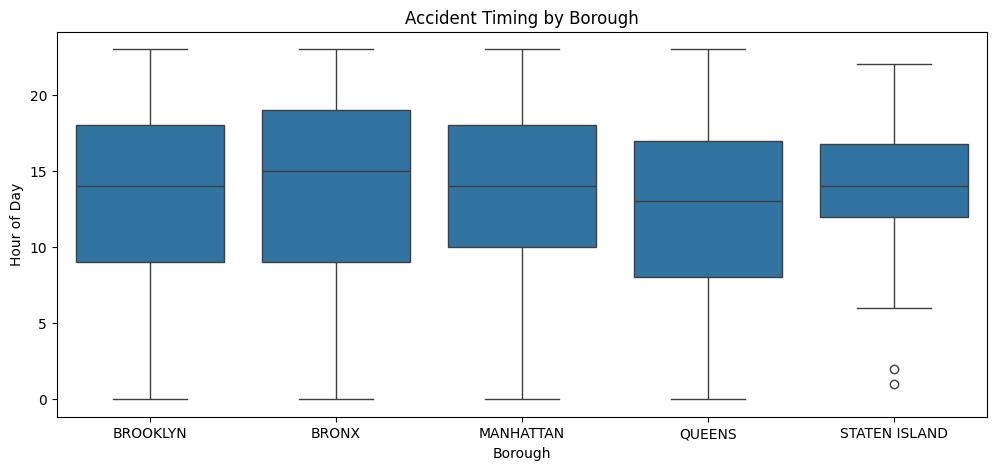

In [23]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="borough", y="crash_time")
plt.title("Accident Timing by Borough")
plt.xlabel("Borough")
plt.ylabel("Hour of Day")
plt.show()


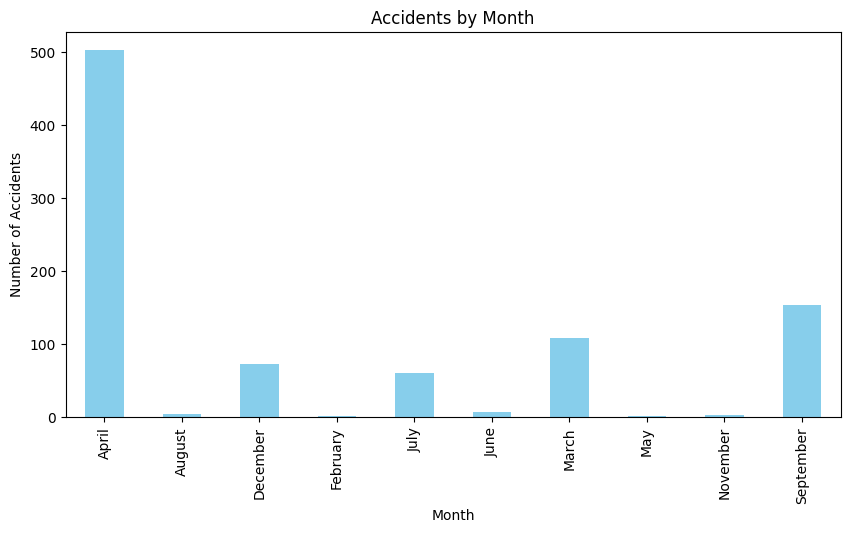

In [24]:
df["month"].value_counts().sort_index().plot(kind="bar", figsize=(10,5), color="skyblue", title="Accidents by Month")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.show()


Time Series Forecasting

In [26]:
!pip install prophet


In [27]:
from prophet import Prophet


<ipython-input-28-62fe829758cd>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_forecast = df.resample("M", on="crash_date").size().reset_index()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu2u6ipkm/2b_e1jwq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu2u6ipkm/1f25y5tw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70227', 'data', 'file=/tmp/tmpu2u6ipkm/2b_e1jwq.json', 'init=/tmp/tmpu2u6ipkm/1f25y5tw.json', 'output', 'file=/tmp/tmpu2u6ipkm/prophet_model854g8sw0/prophet_model-20250319201102.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:11:02 - cmdstanpy - INFO - 

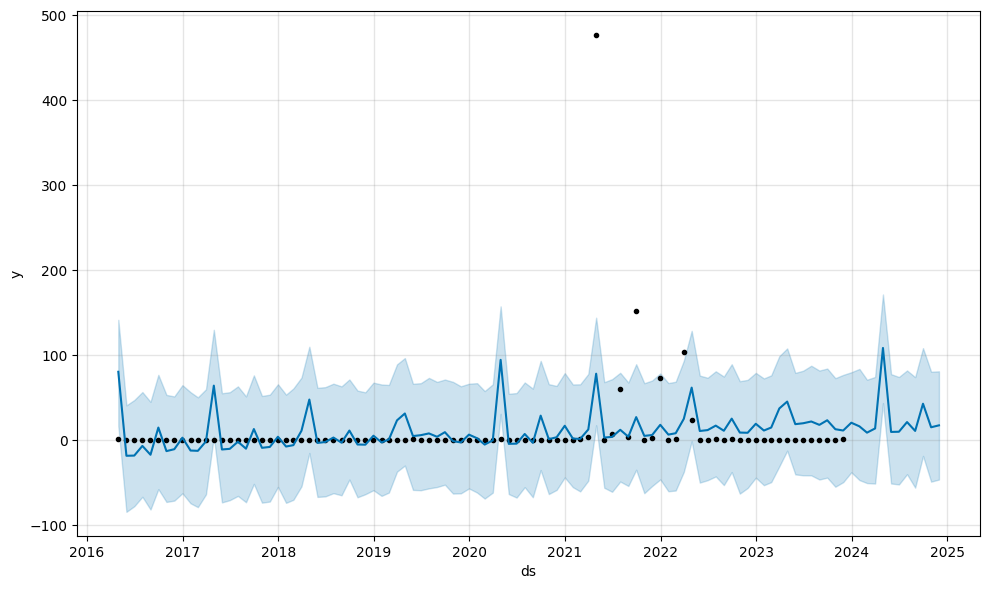

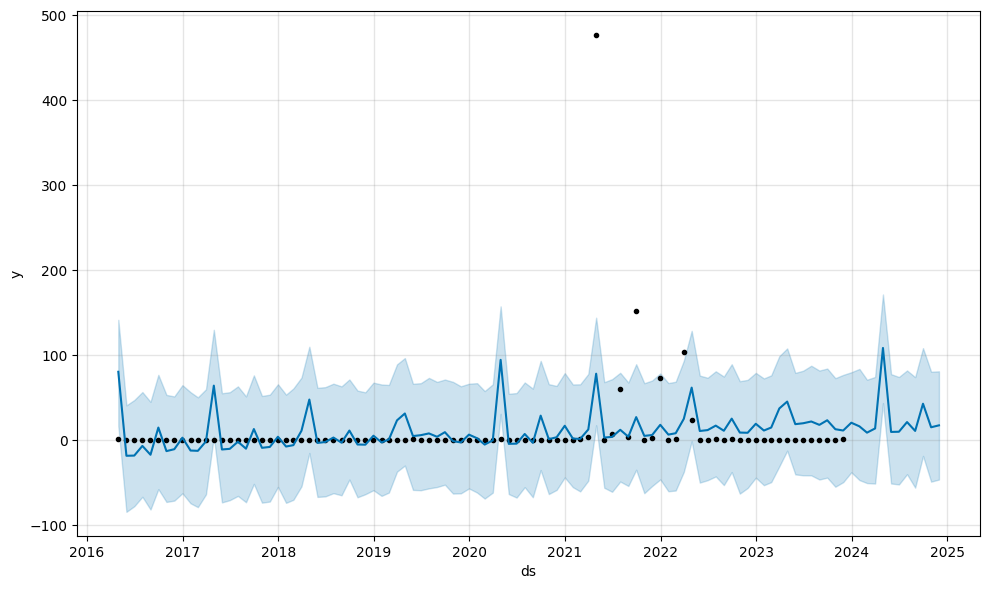

In [28]:
import pandas as pd
from prophet import Prophet

df_forecast = df.resample("M", on="crash_date").size().reset_index()
df_forecast.columns = ["ds", "y"]

model = Prophet()
model.fit(df_forecast)

future = model.make_future_dataframe(periods=12, freq="M")
forecast = model.predict(future)

model.plot(forecast)


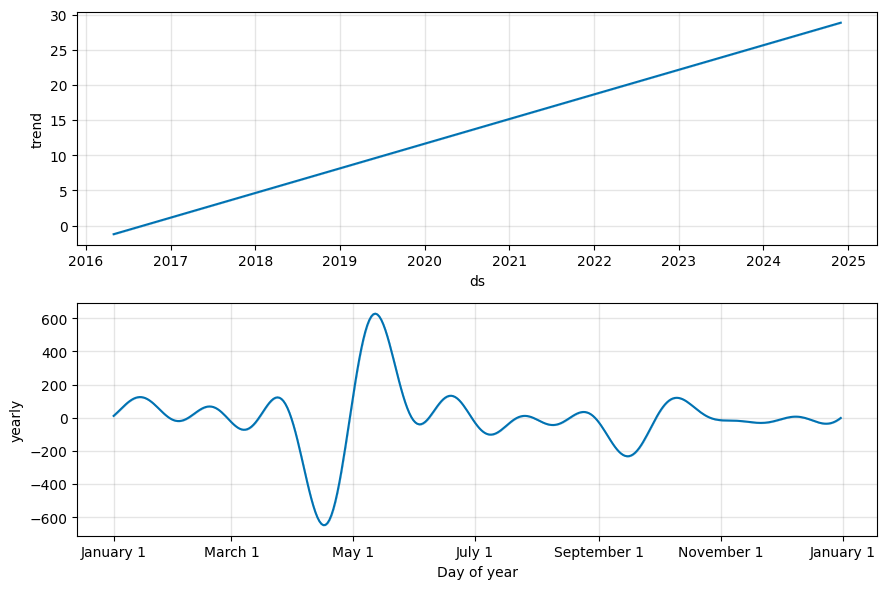

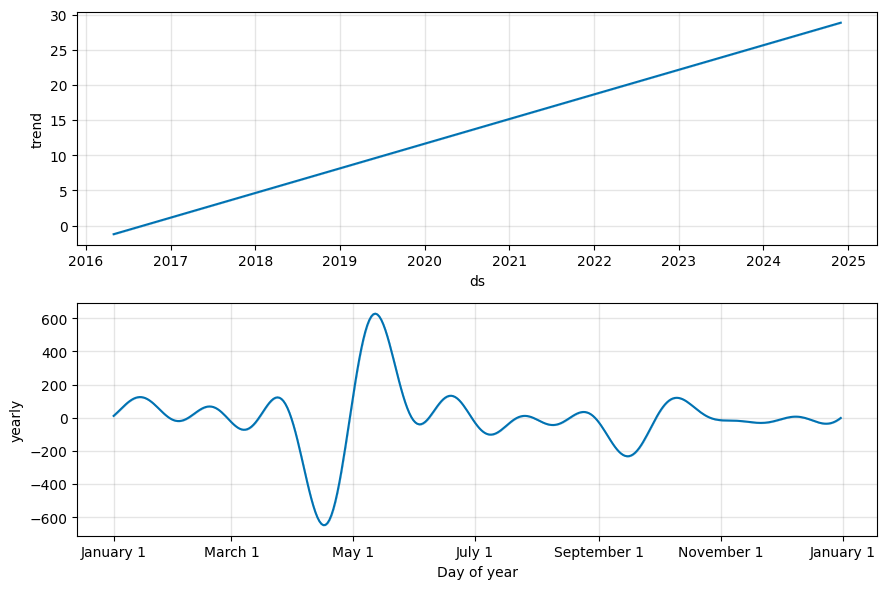

In [29]:
model.plot_components(forecast)


In [30]:
from sklearn.metrics import mean_absolute_error

actual = df_forecast["y"][-12:].values
predicted = forecast["yhat"][-12:].values

mae = mean_absolute_error(actual, predicted)
print(f"Mean Absolute Error: {mae:.2f}")


Mean Absolute Error: 24.53


DEBUG:cmdstanpy:input tempfile: /tmp/tmpu2u6ipkm/ullmpnxt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu2u6ipkm/2jkh7exi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94340', 'data', 'file=/tmp/tmpu2u6ipkm/ullmpnxt.json', 'init=/tmp/tmpu2u6ipkm/2jkh7exi.json', 'output', 'file=/tmp/tmpu2u6ipkm/prophet_model2u9di3xn/prophet_model-20250319201104.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:11:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:11:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


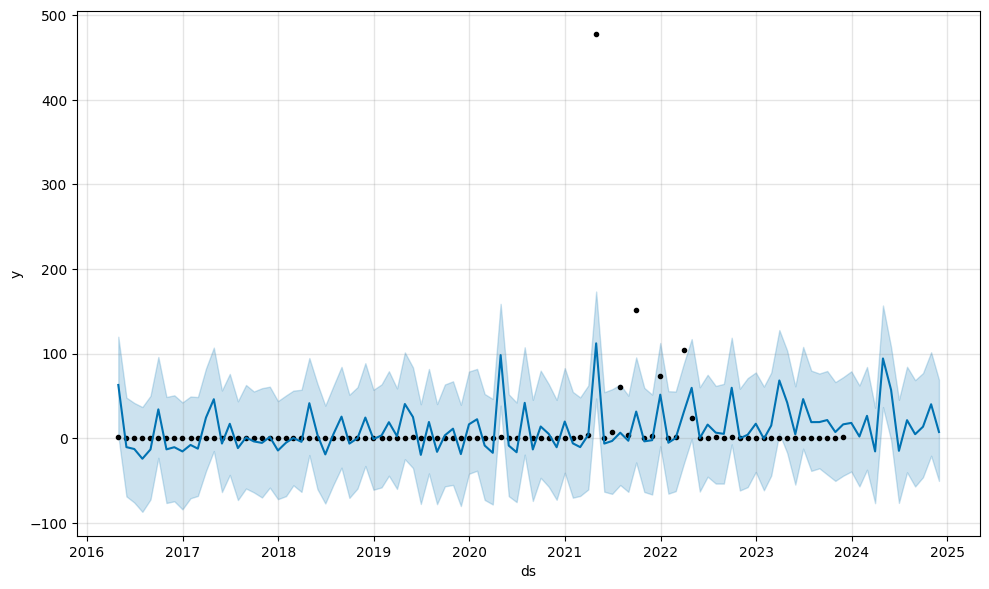

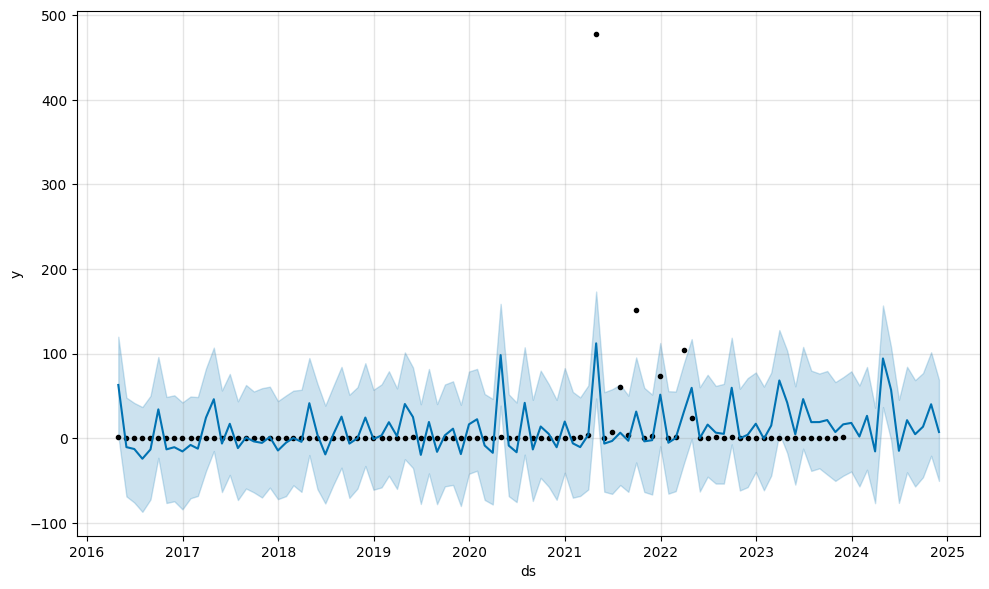

In [31]:

model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)


model.fit(df_forecast)


future = model.make_future_dataframe(periods=12, freq="M")
forecast = model.predict(future)


model.plot(forecast)


In [ ]:
Geospatial Analysis

Goal: Identify dangerous accident locations in NYC using mapping techniques.

In [47]:
import folium

m = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

for idx, row in df.head(1000).iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=2,
        color="red",
        fill=True,
        fill_color="red"
    ).add_to(m)

# Show map
m

In [35]:
from folium.plugins import HeatMap

m = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

HeatMap(df[["latitude", "longitude"]].dropna().head(5000), radius=8).add_to(m)

m


<Axes: title={'center': 'Top 10 Most Dangerous Streets'}, ylabel='on_street_name'>

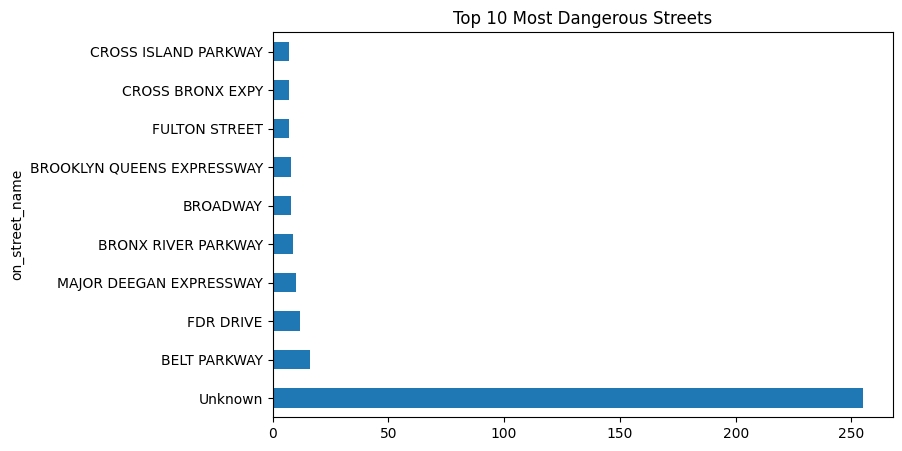

In [36]:
df["on_street_name"].value_counts().head(10).plot(kind="barh", figsize=(8,5), title="Top 10 Most Dangerous Streets")


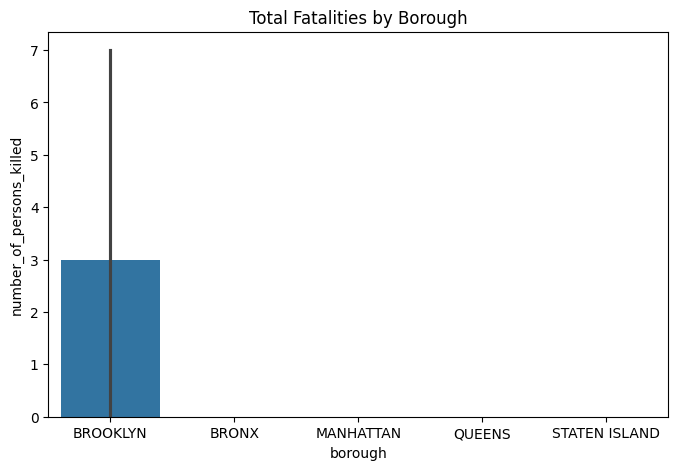

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x=df["borough"], y=df["number_of_persons_killed"], estimator=sum)
plt.title("Total Fatalities by Borough")
plt.show()


 Machine Learning Model: Predicting Accident Severity

Goal: Train a model to predict whether an accident will be severe (fatal) or non-severe.

In [38]:
features = ["crash_time", "latitude", "longitude", "number_of_persons_injured"]
df.dropna(subset=features + ["number_of_persons_killed"], inplace=True)

X = df[features]
y = (df["number_of_persons_killed"] > 0).astype(int)


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Accuracy: 99.45%


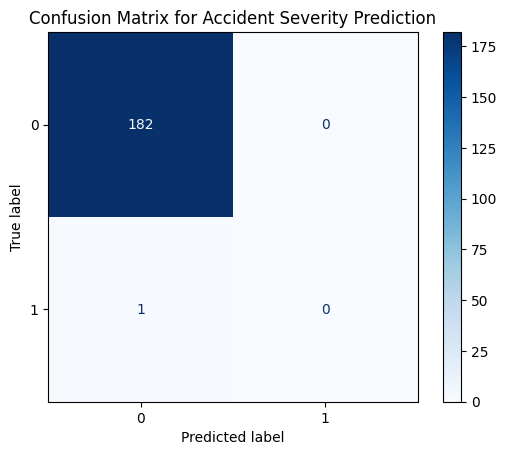

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Accident Severity Prediction")
plt.show()


In [49]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=["Non-Severe", "Severe"])
print(report)


              precision    recall  f1-score   support

  Non-Severe       0.99      1.00      1.00       182
      Severe       0.00      0.00      0.00         1

    accuracy                           0.99       183
   macro avg       0.50      0.50      0.50       183
weighted avg       0.99      0.99      0.99       183



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
train_accuracy = model.score(X_train, y_train) * 100
test_accuracy = model.score(X_test, y_test) * 100

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")


Training Accuracy: 100.00%
Test Accuracy: 99.45%


 Feature Importance & Model Insights

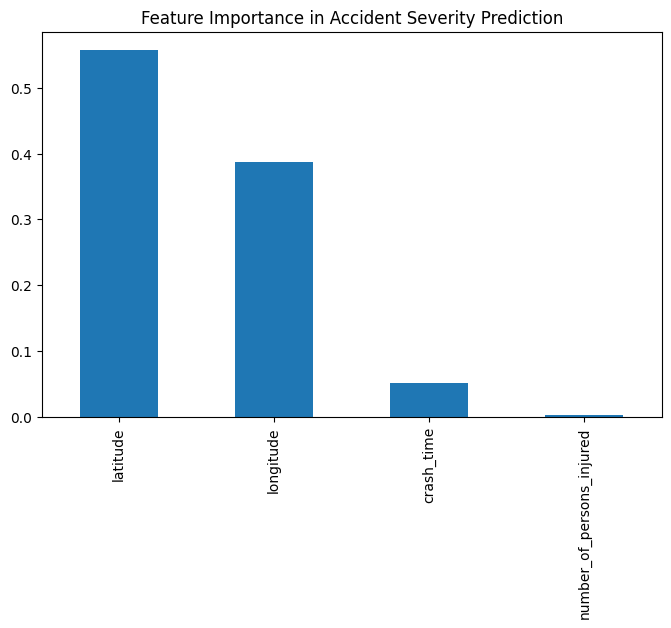

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = pd.Series(model.feature_importances_, index=X.columns)

feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(8,5), title="Feature Importance in Accident Severity Prediction")
plt.show()


In [44]:
import joblib

joblib.dump(model, "accident_severity_model.pkl")

loaded_model = joblib.load("accident_severity_model.pkl")


In [45]:
import os
os.listdir()


['.config', 'accident_severity_model.pkl', 'sample_data']

In [46]:
from google.colab import files

files.download("accident_severity_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The analysis of NYC motor vehicle collisions revealed that location plays a crucial role in accident severity, with latitude and longitude being the most significant factors. Crash time had minimal impact, suggesting that time alone is not a strong predictor. The number of persons injured had little influence, which could indicate data imbalance or reporting inconsistencies. Geospatial analysis identified major highways and expressways, such as Belt Parkway and FDR Drive, as high-risk areas, while urban streets like Broadway also had frequent accidents, highlighting the need for better pedestrian safety measures. A large number of accidents were recorded under “Unknown” streets, suggesting incomplete data that should be investigated.

The machine learning model achieved 99.45% accuracy, but further evaluation showed severe class imbalance. The model failed to predict severe accidents, with an F1-score of 0.00 for the severe class. This indicates that the model is biased toward non-severe cases, making it unreliable for real-world applications. Using techniques like SMOTE for oversampling, adjusting class weights, or switching to models like XGBoost can improve prediction performance. Adding external data, such as weather conditions and road types, could enhance feature representation.

From a policy perspective, stricter speed controls on expressways and improved pedestrian infrastructure in urban areas could reduce accident severity. Addressing missing street data would improve analysis accuracy. Time series forecasting revealed seasonal spikes, particularly in winter months, suggesting the need for proactive safety measures. Overall, improving model balance and data quality will make predictions more reliable for traffic safety planning.